In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [63]:
titanic_df = pd.read_csv('./titanic.csv')
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


### logistic regression needs numerical columns,lets clean the data

In [21]:
titanic_df.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [22]:
# check if any null values
titanic_df.isna().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [64]:
# drop the name column
titanic_df.drop('Name', inplace=True, axis=1)
titanic_df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [67]:
dummies = pd.get_dummies(titanic_df['Sex'])
dummies

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
882,0,1
883,1,0
884,1,0
885,0,1


In [68]:
titanic_df = pd.concat([titanic_df, dummies], axis=1)
titanic_df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,1,2,3,female,male
0,0,3,male,22.0,1,0,7.2500,0,0,1,0,1
1,1,1,female,38.0,1,0,71.2833,1,0,0,1,0
2,1,3,female,26.0,0,0,7.9250,0,0,1,1,0
3,1,1,female,35.0,1,0,53.1000,1,0,0,1,0
4,0,3,male,35.0,0,0,8.0500,0,0,1,0,1


In [73]:
titanic_df.head()

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,1,2,3,female,male
0,0,22.0,1,0,0,0,1,0,1
1,1,38.0,1,0,1,0,0,1,0
2,1,26.0,0,0,0,0,1,1,0
3,1,35.0,1,0,1,0,0,1,0
4,0,35.0,0,0,0,0,1,0,1


In [74]:
# ran above code twice hence, lets drop columns
titanic_df.drop(['Siblings/Spouses Aboard','Parents/Children Aboard'], axis=1, inplace=True)
titanic_df.head()

,Survived,Age,1,2,3,female,male
0,0,22.0,0,0,1,0,1
1,1,38.0,1,0,0,1,0
2,1,26.0,0,0,1,1,0
3,1,35.0,1,0,0,1,0
4,0,35.0,0,0,1,0,1


In [70]:
titanic_df['Siblings/Spouses Aboard'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [71]:
titanic_df['Parents/Children Aboard'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [75]:
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

In [76]:
X.head()

,Age,1,2,3,female,male
0,22.0,0,0,1,0,1
1,38.0,1,0,0,1,0
2,26.0,0,0,1,1,0
3,35.0,1,0,0,1,0
4,35.0,0,0,1,0,1


In [77]:
X.dtypes

Age       float64
1           uint8
2           uint8
3           uint8
female      uint8
male        uint8
dtype: object

In [78]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [33]:
y.dtypes

dtype('int64')

In [79]:
# lets split the train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [80]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((709, 6), (709,), (178, 6), (178,))

In [81]:
# import logistic regression model from scikit library
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/home/vikaskm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
# score from the model
model.score(X_test, y_test)

0.7921348314606742

In [83]:
# model prediction
y_preds = model.predict(X_test)
y_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1])

In [84]:
# lets check the metrics of the model
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_preds)
cm

array([[94, 17],
       [20, 47]])

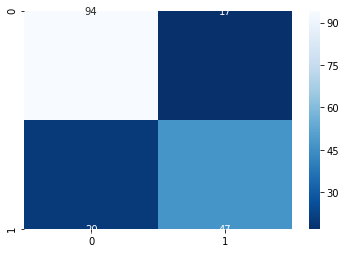

In [85]:
sns.heatmap(cm, annot=True, cmap='Blues_r')

In [86]:
accuracy_score(y_test, y_preds)

0.7921348314606742